<a href="https://colab.research.google.com/github/purvilmehta06/Deep-Learning/blob/master/Lab%207/LabAssignment7_201701073.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 7: Deep Learning


*   Lab Manual: [Manual Lab 7](https://github.com/purvilmehta06/Deep-Learning/blob/master/Lab%207/Lab_Assignment_7.pdf)
*   Author: Purvil Mehta
*   Id : 201701073
*   Github Link : [Deep Learning Course Lab Work Repo](https://github.com/purvilmehta06/Deep-Learning)


# Library Declaration 


In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras.layers import Dropout
from keras.layers import Input, Dense, Layer, InputSpec
import pandas as pd
import numpy as np
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from tensorflow.python.keras import regularizers
from tensorflow.keras import initializers
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import BatchNormalization
from keras import regularizers, activations, initializers,constraints, Sequential
from keras.constraints import UnitNorm, Constraint
from keras import backend as K

# Reading the data

In [22]:
data_test = pd.read_csv('drive/My Drive/Colab Notebooks/Lab 7 Data/fashion-mnist_test.csv')
data_train =pd.read_csv('drive/My Drive/Colab Notebooks/Lab 7 Data/fashion-mnist_train.csv')
data_test = np.array(data_test)[:,1:]
data_train = np.array(data_train)[:,1:]

## Noise Addition

In [23]:
data_train_noise = data_train + 50*np.random.normal(0,1,size=data_train.shape) 
data_test_noise = data_test + 50*np.random.normal(0,1,size=data_test.shape) 

## Preview of the sample Image

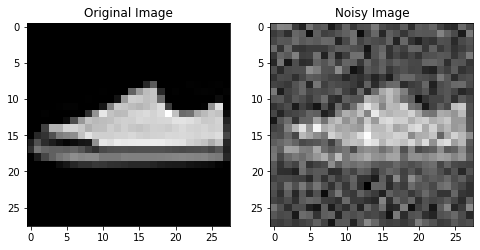

In [24]:
import matplotlib.pyplot as plt
example_image = 111
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(np.reshape(data_train[example_image],(28,28)),cmap='gray')
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(np.reshape(data_train_noise[example_image],(28,28)),cmap='gray')
plt.title('Noisy Image')
plt.show()

## Data Normalisation

In [25]:
data_train_noise = data_train_noise/255.0
data_test_noise = data_test_noise/255.0
data_train = data_train/255.0
data_test = data_test/255.0

# Supportive Functions

In [26]:
def modelInit(layersNode,input_dim,act,init='glorot_uniform',kernelRegularizer=None):
  model = Sequential()
  model.add(Dense(layersNode[0],input_dim=input_dim,activation=act[0],kernel_initializer=init,kernel_regularizer=kernelRegularizer))
  for i in range(len(layersNode)-1):
    model.add(Dense(layersNode[i+1], activation=act[i+1]))
  return model

In [27]:
def calculateRes(model,data_train_noise,data_train,epochs,batch_size,layers):
  model.compile(loss='mse', optimizer='adam', metrics=['mse'])
  history_model = model.fit(data_train_noise, data_train, epochs=epochs,verbose=0,batch_size=batch_size) 
  print('Model with layer {}: Training Finished with MSE => {}'.format(layers,history_model.history['mse'][epochs-1]))
  return history_model 

In [28]:
def plot_validation_loss(data,titles):
  for i in range(len(data)):
    plt.plot(data[i])
  plt.title('Validation loss history')
  plt.ylabel('Loss value')
  plt.xlabel('No. epoch')
  plt.legend(titles)
  plt.grid()
  plt.show()

In [29]:
def visulise_result(a,b,titles,data):
  plt.figure(figsize=(15,12))
  for i in range(len(data)):   
    plt.subplot(a,b,i+1)
    plt.imshow(np.reshape(data[i],(28,28)),cmap='gray')
    plt.title(titles[i])
  plt.show()

# Undecomplete Encoder

## Different layers and comparision

Model with layer 5: Training Finished with MSE => 0.017092054709792137
Model with layer 4: Training Finished with MSE => 0.019586199894547462
Model with layer 3: Training Finished with MSE => 0.016429875046014786


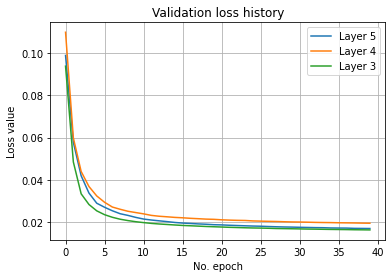

In [30]:
input_dim = 784
epochs = 40
batch_size = 2000

################### 5 Layer ######################################################
layersNode = [256,128,32,128,256,784]
act = ['relu','relu','relu','relu','relu','relu']
model1 = modelInit(layersNode,input_dim,act)
history_model1 = calculateRes(model1,data_train_noise,data_train,epochs,batch_size,5)

################### 4 Layer ######################################################
layersNode = [256,128,32,128,784]
act = ['relu','relu','relu','relu','relu']
model2 = modelInit(layersNode,input_dim,act)
history_model2 = calculateRes(model2,data_train_noise,data_train,epochs,batch_size,4)

################### 3 Layer ######################################################
layersNode = [256,32,256,784]
act = ['relu','relu','relu','relu']
model3 = modelInit(layersNode,input_dim,act)
history_model3 = calculateRes(model3,data_train_noise,data_train,epochs,batch_size,3)

titles=['Layer 5','Layer 4','Layer 3']
plot_validation_loss([history_model1.history['mse'],history_model2.history['mse'],history_model3.history['mse']],titles)

### Preview of all three type of Auto encoder

In [31]:
ans1 = model1.predict(data_train_noise)
ans2 = model2.predict(data_train_noise)
ans3 = model3.predict(data_train_noise)

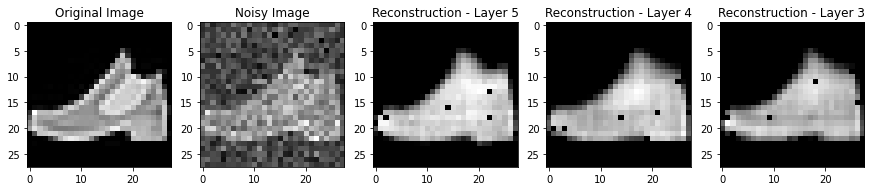

In [32]:
example_image = 1
titles = ['Original Image','Noisy Image','Reconstruction - Layer 5','Reconstruction - Layer 4','Reconstruction - Layer 3']
visulise_result(1,5,titles,[data_train[example_image],data_train_noise[example_image],ans1[example_image]*255,
                            ans2[example_image]*255,ans3[example_image]*255])

We observed that layer 5 is performing more better than layer 3 and 4. All the architacture has reported the MSE as low as 0.02 which is quite good in image denoising. The reconstructed image is also shown here which also removes the noise significantly 

## Different Weight Initialisation

Model with layer Uniform: Training Finished with MSE => 0.019938239827752113
Model with layer Glorot Normal: Training Finished with MSE => 0.017063863575458527
Model with layer HeNormal: Training Finished with MSE => 0.01709921658039093


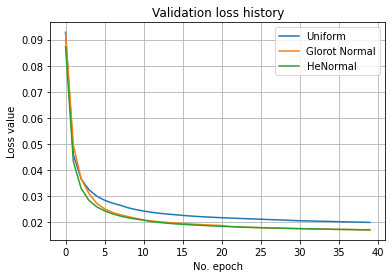

In [33]:
input_dim = 784
epochs = 40
batch_size = 2000
layersNode = [256,32,256,784]
act = ['relu','relu','relu','relu']

model1 = modelInit(layersNode,input_dim,act,tf.keras.initializers.RandomUniform(minval=-0.5, maxval=0.5))
history_model1 = calculateRes(model1,data_train_noise,data_train,epochs,batch_size,'Uniform')

model2 = modelInit(layersNode,input_dim,act,tf.keras.initializers.GlorotNormal())
history_model2 = calculateRes(model2,data_train_noise,data_train,epochs,batch_size,'Glorot Normal')

model3 = modelInit(layersNode,input_dim,act,tf.keras.initializers.HeNormal())
history_model3 = calculateRes(model3,data_train_noise,data_train,epochs,batch_size,'HeNormal')

titles = ['Uniform','Glorot Normal','HeNormal']
plot_validation_loss([history_model1.history['mse'],history_model2.history['mse'],history_model3.history['mse']],titles)  

In [34]:
ans1 = model1.predict(data_train_noise)
ans2 = model2.predict(data_train_noise)
ans3 = model3.predict(data_train_noise)

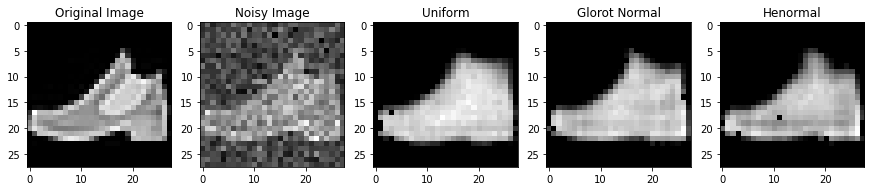

In [35]:
example_image = 1
titles = ['Original Image','Noisy Image','Uniform','Glorot Normal','Henormal']
visulise_result(1,5,titles,[data_train[example_image],data_train_noise[example_image],ans1[example_image]*255,
                            ans2[example_image]*255,ans3[example_image]*255])

## Weight Tying

### Customised Layers weights tying

This piece of code [Just below Cell] is taken from : [Towards Data Science](https://towardsdatascience.com/build-the-right-autoencoder-tune-and-optimize-using-pca-principles-part-ii-24b9cca69bd6)

In [36]:
class DenseTied(Layer):
    def __init__(self, units,
                 activation=None,
                 use_bias=True,
                 kernel_initializer='glorot_uniform',
                 bias_initializer='zeros',
                 kernel_regularizer=None,
                 bias_regularizer=None,
                 activity_regularizer=None,
                 kernel_constraint=None,
                 bias_constraint=None,
                 tied_to=None,
                 **kwargs):
        self.tied_to = tied_to
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        super().__init__(**kwargs)
        self.units = units
        self.activation = activations.get(activation)
        self.use_bias = use_bias
        self.kernel_initializer = initializers.get(kernel_initializer)
        self.bias_initializer = initializers.get(bias_initializer)
        self.kernel_regularizer = regularizers.get(kernel_regularizer)
        self.bias_regularizer = regularizers.get(bias_regularizer)
        self.activity_regularizer = regularizers.get(activity_regularizer)
        self.kernel_constraint = constraints.get(kernel_constraint)
        self.bias_constraint = constraints.get(bias_constraint)
        self.input_spec = InputSpec(min_ndim=2)
        self.supports_masking = True
                
    def build(self, input_shape):
        assert len(input_shape) >= 2
        input_dim = input_shape[-1]

        if self.tied_to is not None:
            self.kernel = K.transpose(self.tied_to.kernel)
            self._non_trainable_weights.append(self.kernel)
        else:
            self.kernel = self.add_weight(shape=(input_dim, self.units),
                                          initializer=self.kernel_initializer,
                                          name='kernel',
                                          regularizer=self.kernel_regularizer,
                                          constraint=self.kernel_constraint)
        if self.use_bias:
            self.bias = self.add_weight(shape=(self.units,),
                                        initializer=self.bias_initializer,
                                        name='bias',
                                        regularizer=self.bias_regularizer,
                                        constraint=self.bias_constraint)
        else:
            self.bias = None
        self.input_spec = InputSpec(min_ndim=2, axes={-1: input_dim})
        self.built = True

    def compute_output_shape(self, input_shape):
        assert input_shape and len(input_shape) >= 2
        output_shape = list(input_shape)
        output_shape[-1] = self.units
        return tuple(output_shape)

    def call(self, inputs):
        output = K.dot(inputs, self.kernel)
        if self.use_bias:
            output = K.bias_add(output, self.bias, data_format='channels_last')
        if self.activation is not None:
            output = self.activation(output)
        return output

Model with tied weights: Training Finished with MSE => 0.06855248659849167
Model is trained in 84.137930393219s time
Model without tied weights: Training Finished with MSE => 0.017862951382994652
Model is trained in 99.26983141899109s time


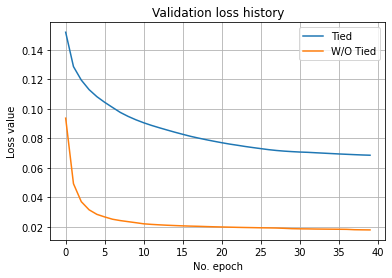

In [37]:
import time
input_dim = 784
epochs = 40
batch_size = 2000
layersNode = [256,32,256,784] # three hidden layers
act = ['relu','relu','relu','relu']

#################---TIED WEIGHTS----######################################################
model = Sequential()
encoder = Dense(256,input_dim=784,activation='relu')
model.add(encoder)
model.add(Dense(32, activation='relu'))
model.add(Dense(256, activation='relu'))
decoder = DenseTied(784, activation='relu', tied_to=encoder)
model.add(decoder)
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
start = time.time()
history_model1 = model.fit(data_train_noise, data_train, epochs=epochs,verbose=0,batch_size=batch_size) 
end = time.time()
print('Model with tied weights: Training Finished with MSE => {}'.format(history_model1.history['mse'][epochs-1]))
print('Model is trained in {}s time'.format(end-start))

#################---WITHOUT TIED WEIGHTS----######################################################
model2 = modelInit(layersNode,input_dim,act)
model2.compile(loss='mse', optimizer='adam', metrics=['mse'])
start = time.time()
history_model2 = model2.fit(data_train_noise, data_train, epochs=epochs,verbose=0,batch_size=batch_size) 
end = time.time()
print('Model without tied weights: Training Finished with MSE => {}'.format(history_model2.history['mse'][epochs-1]))
print('Model is trained in {}s time'.format(end-start))

################################################################################################3
titles = ['Tied','W/O Tied']
plot_validation_loss([history_model1.history['mse'],history_model2.history['mse']],titles)  

In [38]:
ans1 = model1.predict(data_train_noise)
ans2 = model2.predict(data_train_noise)

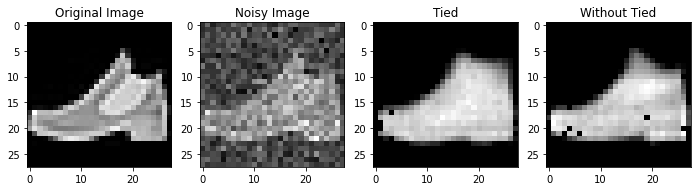

In [39]:
example_image = 1
titles = ['Original Image','Noisy Image','Tied','Without Tied']
visulise_result(1,5,titles,[data_train[example_image],data_train_noise[example_image],ans1[example_image]*255,ans2[example_image]*255])

### Conclusion
1. Time coplexity analysis. We observed that the time taken to train the model with tied weights is lesser than the non - tied weights architecture. It is also trivial to notice that the trainable parameter in tied architecture is less than the non-tied. 
2. Since trainable parameter reduces, the MSE should go up and we also get the same results. 

# Overcomplete Encoder

## Different Layers and Comparision

Model with layer 5: Training Finished with MSE => 0.025933394208550453
Model with layer 4: Training Finished with MSE => 0.02600741945207119
Model with layer 3: Training Finished with MSE => 0.024173863232135773


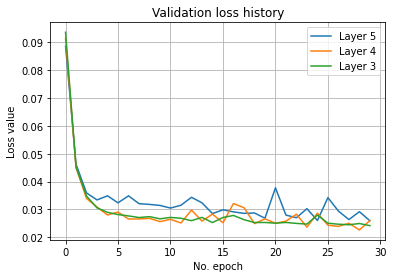

In [40]:
input_dim = 784
epochs = 30
batch_size = 5000

################### 5 Layer ######################################################
layersNode = [1000,1200,1000,784]
act = ['relu','relu','relu','relu']
model1 = modelInit(layersNode,input_dim,act,kernelRegularizer=regularizers.l2(0.01))
history_model1 = calculateRes(model1,data_train_noise,data_train,epochs,batch_size,5)

################### 4 Layer ######################################################
layersNode = [1000,800,784]
act = ['relu','relu','relu']
model2 = modelInit(layersNode,input_dim,act,kernelRegularizer=regularizers.l2(0.01))
model2.compile(loss='mse', optimizer='adam', metrics=['mse'])
history_model2 = calculateRes(model2,data_train_noise,data_train,epochs,batch_size,4)

################### 3 Layer ######################################################
layersNode = [1000,784]
act = ['relu','relu']
model3 = modelInit(layersNode,input_dim,act,kernelRegularizer=regularizers.l2(0.01))
history_model3 = calculateRes(model3,data_train_noise,data_train,epochs,batch_size,3)

titles=['Layer 5','Layer 4','Layer 3']
plot_validation_loss([history_model1.history['mse'],history_model2.history['mse'],history_model3.history['mse']],titles)  

In [41]:
ans1 = model1.predict(data_train_noise)
ans2 = model2.predict(data_train_noise)
ans3 = model3.predict(data_train_noise)

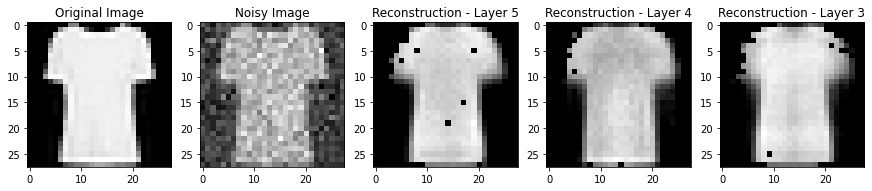

In [42]:
example_image = 110
titles = ['Original Image','Noisy Image','Reconstruction - Layer 5','Reconstruction - Layer 4','Reconstruction - Layer 3']
visulise_result(1,5,titles,[data_train[example_image],data_train_noise[example_image],ans1[example_image]*255,
                            ans2[example_image]*255,ans3[example_image]*255])

## Different Weight Initialisation

Model with layer Uniform: Training Finished with MSE => 0.023286068812012672
Model with layer Glorot Normal: Training Finished with MSE => 0.02354668639600277
Model with layer HeNormal: Training Finished with MSE => 0.02763739973306656


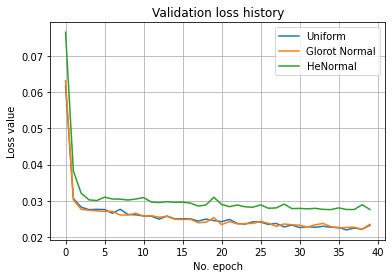

In [43]:
input_dim = 784
epochs = 40
batch_size = 2000
layersNode = [1000,784]
act = ['relu','relu']

model1 = modelInit(layersNode,input_dim,act,tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05),regularizers.l2(0.01))
history_model1 = calculateRes(model1,data_train_noise,data_train,epochs,batch_size,'Uniform')

model2 = modelInit(layersNode,input_dim,act,tf.keras.initializers.GlorotNormal(),regularizers.l2(0.01))
history_model2 = calculateRes(model2,data_train_noise,data_train,epochs,batch_size,'Glorot Normal')

model3 = modelInit(layersNode,input_dim,act,tf.keras.initializers.HeNormal(),regularizers.l2(0.01))
history_model3 = calculateRes(model3,data_train_noise,data_train,epochs,batch_size,'HeNormal')

titles = ['Uniform','Glorot Normal','HeNormal']
plot_validation_loss([history_model1.history['mse'],history_model2.history['mse'],history_model3.history['mse']],titles)  

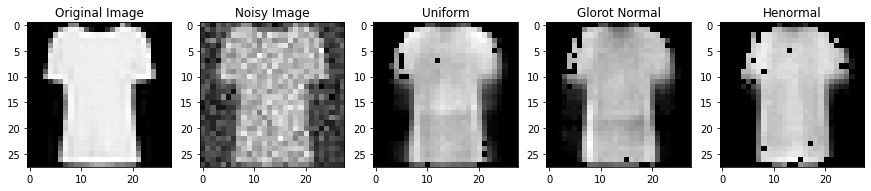

In [44]:
ans1 = model1.predict(data_train_noise)
ans2 = model2.predict(data_train_noise)
ans3 = model3.predict(data_train_noise)
example_image = 110
titles = ['Original Image','Noisy Image','Uniform','Glorot Normal','Henormal']
visulise_result(1,5,titles,[data_train[example_image],data_train_noise[example_image],ans1[example_image]*255,
                            ans2[example_image]*255,ans3[example_image]*255])

## Weight Tying

Model with tied weights: Training Finished with MSE => 0.018484245985746384
Model is trained in 258.8519628047943s time
Model without tied weights: Training Finished with MSE => 0.009824679233133793
Model is trained in 321.52228808403015s time


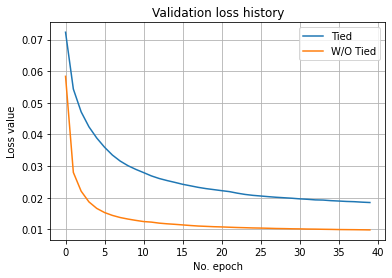

In [45]:
import time
input_dim = 784
epochs = 40
batch_size = 2000
layersNode = [1000,784] # three hidden layers
act = ['relu','relu']

#################---TIED WEIGHTS----######################################################
model = Sequential()
encoder = Dense(1000,input_dim=784,activation='relu')
model.add(encoder)
decoder = DenseTied(784, activation='relu', tied_to=encoder)
model.add(decoder)
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
start = time.time()
history_model1 = model.fit(data_train_noise, data_train, epochs=epochs,verbose=0,batch_size=batch_size) 
end = time.time()
print('Model with tied weights: Training Finished with MSE => {}'.format(history_model1.history['mse'][epochs-1]))
print('Model is trained in {}s time'.format(end-start))

#################---WITHOUT TIED WEIGHTS----######################################################
model2 = modelInit(layersNode,input_dim,act)
model2.compile(loss='mse', optimizer='adam', metrics=['mse'])
start = time.time()
history_model2 = model2.fit(data_train_noise, data_train, epochs=epochs,verbose=0,batch_size=batch_size) 
end = time.time()
print('Model without tied weights: Training Finished with MSE => {}'.format(history_model2.history['mse'][epochs-1]))
print('Model is trained in {}s time'.format(end-start))

################################################################################################3
titles = ['Tied','W/O Tied']
plot_validation_loss([history_model1.history['mse'],history_model2.history['mse']],titles)  

In [46]:
ans1 = model1.predict(data_train_noise)
ans2 = model2.predict(data_train_noise)

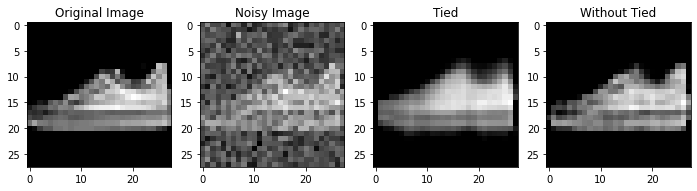

In [50]:
example_image = 21
titles = ['Original Image','Noisy Image','Tied','Without Tied']
visulise_result(1,5,titles,[data_train[example_image],data_train_noise[example_image],ans1[example_image]*255,ans2[example_image]*255])

### Conclusion

1. Time coplexity analysis. We observed that the time taken to train the model with tied weights is lesser than the non - tied weights architecture. It is also trivial to notice that the trainable parameter in tied architecture is less than the non-tied. 
2. Since trainable parameter reduces, the MSE should go up and we also get the same results. 